In [2]:
import pandas as pd


df = pd.read_csv('datos_transformados2.csv', encoding='latin-1', sep=';')

df.head()


,Sexo,Edad,Nivel de estudios,Consumo de bebidas alchólicas
0,Hombres,De 15 a 24 años,Básico e inferior,Sí­ ha consumido
1,Hombres,De 15 a 24 años,Básico e inferior,Sí­ ha consumido
2,Hombres,De 15 a 24 años,Básico e inferior,Sí­ ha consumido
3,Hombres,De 15 a 24 años,Básico e inferior,Sí­ ha consumido
4,Hombres,De 15 a 24 años,Básico e inferior,Sí­ ha consumido


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score

features = ['Sexo', 'Edad', 'Nivel de estudios']
X = df[features].copy()
y = df['Consumo de bebidas alchólicas'].copy()

label_encoder = LabelEncoder()
X['Sexo'] = label_encoder.fit_transform(X['Sexo'])
X['Edad'] = label_encoder.fit_transform(X['Edad'])
X['Nivel de estudios'] = label_encoder.fit_transform(X['Nivel de estudios'])
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, max_features='log2', random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))


Accuracy: 0.6874608543154203
Precision: 0.6724738552511441
Recall: 0.6874608543154203


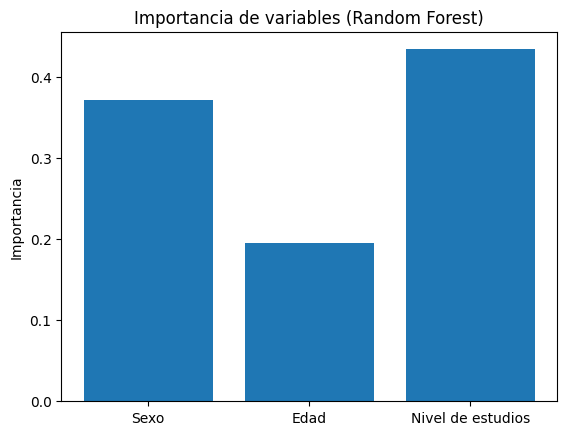

In [4]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X.columns

plt.bar(feature_names, importances)
plt.title("Importancia de variables (Random Forest)")
plt.ylabel("Importancia")
plt.show()


In [5]:
!pip install shap


In [7]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)


In [9]:
import numpy as np

print("Tipo:", type(shap_values))
print("Cantidad de elementos:", len(shap_values))

if isinstance(shap_values, list):
    for i, sv in enumerate(shap_values):
        print(f"shap_values[{i}] shape:", np.array(sv).shape)
else:
    print("shap_values shape:", np.array(shap_values).shape)


Tipo: <class 'numpy.ndarray'>
Cantidad de elementos: 7983
shap_values shape: (7983, 3, 2)


In [10]:
# Seleccionamos SHAP values para la clase 1 (índice 1 en la 3ª dimensión)
shap_array = shap_values[:, :, 1]

# Creamos el DataFrame con nombres de columnas
shap_df = pd.DataFrame(shap_array, columns=X_test.columns)

# Mostramos las primeras filas
shap_df.head()


,Sexo,Edad,Nivel de estudios
0,-0.065468,-0.030356,-0.138949
1,0.076946,0.025427,0.042284
2,-0.073253,0.019816,0.063521
3,-0.073253,0.019816,0.063521
4,-0.075686,0.030155,0.111891


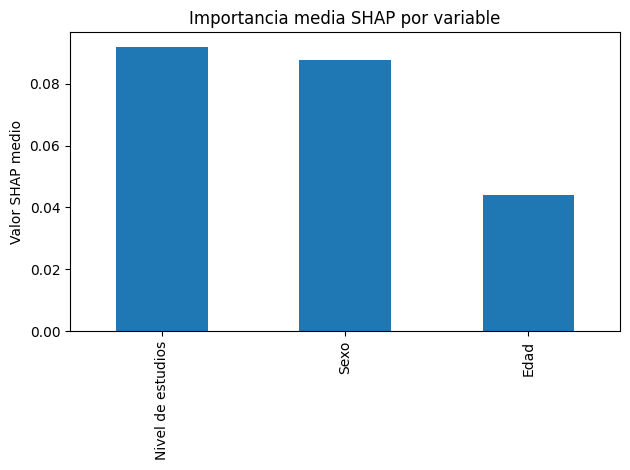

In [11]:
# Importancia media (manual)
mean_abs_shap = shap_df.abs().mean().sort_values(ascending=False)

# Graficar tu propio SHAP plot
mean_abs_shap.plot(kind='bar', title='Importancia media SHAP por variable', ylabel='Valor SHAP medio')
plt.tight_layout()
plt.show()

